In [39]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import cv2
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import pytesseract
from PIL import Image
import os

In [9]:
print(cv2.__version__)
# mnist = fetch_mldata("MNIST original")
# x_train, y_train = mnist.data / 255., mnist.target

3.4.1


(1797, 64)
(1797,)


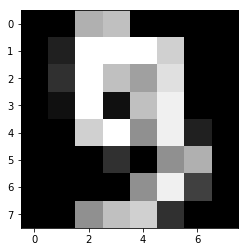

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)
plt.imshow(np.reshape(digits.data[9],(8,8)),cmap=plt.cm.gray)

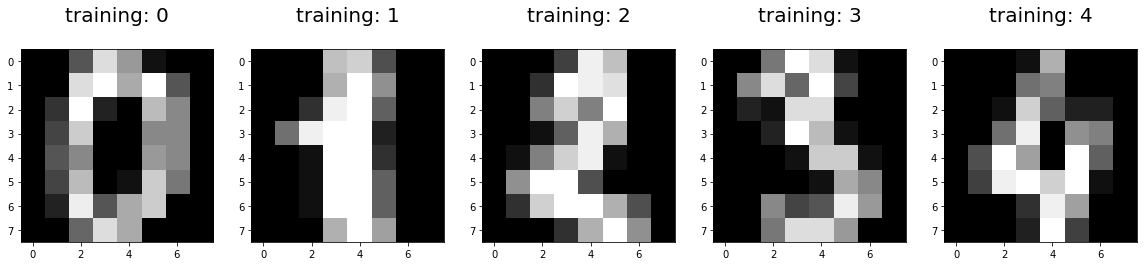

In [5]:
plt.figure(figsize=(20,4))
data=enumerate(zip(digits.data[0:5],digits.target[0:5]))
for index,(image,label) in data:
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training: %i\n' %label,fontsize=20)
plt.show()

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(digits.data,digits.target,test_size=0.33)
print(len(xtrain)==len(ytrain))
print(len(ytest)==len(xtest))

True
True


In [69]:
mlpclf=MLPClassifier(solver='lbfgs', activation='logistic',
                     learning_rate='adaptive')
mlpclf.fit(xtrain, ytrain)

for i in range(len(xtest)):
    img=xtest[i]
    res=cv2.resize(img,dsize=(8,8),interpolation=cv2.INTER_CUBIC)
    res=res.reshape((8*8))
    res=res/255.
    print(ytest[i], mlpclf.predict([res])) #clf.predict([res]) is an array
  #  plt.imshow(np.reshape(img,(8, 8)), cmap=plt.cm.gray)
    # plt.title('prediction: %i' % clf.predict([res]), fontsize=28)
    # plt.show()
print(mlpclf.score(xtest, ytest))

4 [4]
5 [2]
4 [2]
4 [4]
2 [4]
0 [2]
7 [4]
7 [4]
0 [2]
7 [2]
8 [4]
9 [2]
0 [2]
7 [2]
4 [2]
9 [2]
3 [2]
8 [4]
2 [2]
2 [2]
0 [2]
8 [4]
9 [9]
0 [2]
2 [2]
2 [2]
1 [4]
1 [4]
6 [4]
9 [9]
2 [2]
0 [2]
0 [2]
4 [2]
1 [2]
6 [2]
2 [2]
8 [2]
3 [9]
2 [4]
8 [4]
8 [4]
1 [4]
3 [2]
4 [2]
4 [4]
5 [5]
1 [2]
3 [5]
1 [4]
6 [2]
2 [2]
1 [4]
2 [2]
9 [9]
5 [2]
8 [4]
5 [2]
1 [4]
2 [4]
5 [5]
6 [2]
7 [4]
7 [4]
3 [4]
1 [4]
5 [2]
1 [4]
8 [5]
6 [2]
2 [2]
2 [4]
1 [4]
8 [4]
5 [2]
1 [4]
6 [2]
9 [4]
3 [9]
9 [2]
0 [2]
0 [2]
2 [2]
0 [2]
2 [2]
2 [2]
2 [4]
7 [4]
1 [4]
7 [2]
2 [2]
3 [2]
2 [2]
3 [2]
7 [4]
7 [4]
2 [4]
8 [2]
4 [2]
9 [2]
8 [4]
9 [2]
2 [4]
5 [2]
3 [2]
3 [4]
5 [2]
8 [4]
3 [9]
3 [9]
5 [2]
0 [2]
7 [4]
2 [4]
9 [2]
8 [4]
3 [9]
2 [2]
3 [9]
7 [2]
1 [4]
3 [2]
5 [2]
8 [4]
5 [2]
3 [9]
1 [4]
9 [9]
7 [4]
8 [9]
1 [4]
4 [4]
6 [2]
0 [2]
9 [2]
0 [2]
2 [2]
9 [2]
0 [2]
9 [4]
4 [4]
6 [4]
1 [4]
5 [5]
9 [5]
0 [2]
4 [2]
2 [2]
4 [2]
8 [4]
6 [2]
4 [4]
0 [2]
6 [2]
2 [4]
6 [2]
5 [2]
2 [2]
4 [4]
8 [4]
6 [2]
0 [2]
0 [2]
4 [2]
5 [5]
4 [2]
1 [4

1 [4]
2 [2]
1 [4]
3 [4]
6 [2]
2 [2]
0 [2]
5 [2]
2 [4]
0 [2]
1 [2]
7 [2]
0 [2]
5 [2]
3 [4]
7 [4]
5 [2]
1 [4]
9 [2]
1 [2]
1 [4]
2 [2]
9 [2]
0 [2]
2 [2]
0 [2]
1 [4]
1 [4]
1 [4]
5 [2]
1 [4]
8 [4]
2 [2]
1 [4]
3 [4]
7 [4]
6 [2]
6 [2]
5 [4]
3 [5]
5 [4]
2 [2]
5 [4]
4 [4]
8 [4]
1 [9]
1 [4]
6 [2]
0 [2]
9 [2]
4 [4]
9 [9]
3 [2]
6 [2]
8 [4]
5 [2]
9 [9]
0 [2]
5 [2]
8 [4]
5 [2]
3 [2]
2 [2]
3 [9]
7 [4]
1 [4]
3 [2]
7 [4]
8 [4]
5 [4]
7 [2]
3 [2]
1 [4]
3 [2]
6 [4]
0 [2]
4 [2]
6 [2]
1 [9]
3 [2]
0 [2]
4 [2]
1 [4]
9 [2]
8 [4]
3 [9]
7 [4]
3 [9]
0 [2]
0 [2]
6 [2]
7 [2]
6 [2]
5 [2]
7 [4]
8 [4]
9 [9]
1 [4]
5 [2]
9 [2]
6 [2]
4 [2]
3 [9]
9 [9]
9 [2]
7 [4]
0 [2]
1 [4]
2 [4]
0 [2]
8 [4]
9 [9]
2 [2]
8 [4]
9 [5]
8 [4]
1 [4]
9 [9]
7 [4]
7 [4]
8 [4]
5 [2]
1 [4]
9 [4]
5 [2]
0 [2]
6 [2]
9 [2]
4 [2]
7 [4]
7 [2]
4 [2]
6 [2]
9 [2]
1 [4]
5 [2]
5 [2]
3 [9]
5 [2]
5 [9]
8 [4]
5 [5]
0 [2]
5 [2]
7 [4]
1 [4]
3 [9]
7 [2]
2 [2]
3 [2]
9 [2]
8 [4]
0 [2]
6 [2]
0 [2]
1 [4]
7 [4]
3 [4]
5 [2]
7 [4]
8 [4]
4 [4]
6 [2]
8 [4]
7 [4]
2 [2]
9 [2

In [36]:
logclf=LogisticRegression(solver='saga',max_iter=10000
                          ,n_jobs=4,multi_class='ovr')

logclf.fit(xtrain,ytrain)
l=logclf.predict(xtest[0].reshape(1,-1))[0]
print('pred=',l,'\tlabelactual=',ytest[0])

for i in range(len(xtest)):
    img=xtest[i]
    print('the label: ',ytest[i],'\tthe prediction: ',logclf.predict(img.reshape(1,-1))[0]) #clf.predict([res]) is an array
    # plt.imshow(np.reshape(img,(8, 8)), cmap=plt.cm.gray)
    # plt.title('prediction: %i' % logclf.predict([img]), fontsize=28)
    # plt.show()
print(logclf.score(xtest, ytest))

pred= 4 	labelactual= 4
the label:  4 	the prediction:  4
the label:  9 	the prediction:  9
the label:  8 	the prediction:  8
the label:  4 	the prediction:  4
the label:  1 	the prediction:  1
the label:  9 	the prediction:  9
the label:  1 	the prediction:  1
the label:  3 	the prediction:  3
the label:  3 	the prediction:  3
the label:  0 	the prediction:  0
the label:  7 	the prediction:  7
the label:  6 	the prediction:  6
the label:  8 	the prediction:  3
the label:  0 	the prediction:  0
the label:  8 	the prediction:  8
the label:  7 	the prediction:  7
the label:  2 	the prediction:  2
the label:  0 	the prediction:  0
the label:  9 	the prediction:  9
the label:  6 	the prediction:  6
the label:  6 	the prediction:  6
the label:  5 	the prediction:  5
the label:  7 	the prediction:  7
the label:  0 	the prediction:  0
the label:  7 	the prediction:  7
the label:  7 	the prediction:  7
the label:  6 	the prediction:  6
the label:  0 	the prediction:  0
the label:  7 	the predi

In [35]:
yt=np.array(ytest)
print(len(yt))
yt=np.delete(yt,yt[np.where(yt==3)][0])
len(yt)

594


593

In [38]:
s=int(input('2+6='))

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.